## General info

Aids: python help file "python_help_240919.ipynb"


Comment your code in your files (.ipynb or .py) to explain your solutions/answers. Save these codes/files under c:\__exam__\Assignments\

On the top of each file write your anonymous code e.g. #ims135-123456



## Grading

max point= 30p 

grade 5: 24-30p (80-100%)

grade 4: 18-23p (60-80%)

grade 3: 12-17 (40-60%)




In [1]:
#useful packages (from python help file)
import numpy as np
from numpy import linalg as LA
import math as mt
import os
from matplotlib.image import imread
import matplotlib.pyplot as plt
from matplotlib import rcParams # for changing default values
import scipy.io as sio
import scipy.optimize
from scipy.optimize import minimize
import timeit
import torch
from torch.autograd import grad
import torch.nn as nn
import torch.optim as optim
import random
from scipy.integrate import odeint

## 1. (3p)

Explain the fundamental differences between regression, classification, and clustering in machine learning. Provide examples of  applications for each of these tasks and tell whether they belong to supervised or unsupervised learning methods.



Answer (from Chat GPT):

Machine learning encompasses various tasks, and three fundamental types are regression, classification, and clustering. Each of these tasks serves distinct purposes in data analysis and pattern recognition.

1. Regression:

Definition: Regression is a supervised learning task that deals with predicting a continuous output or numerical value based on input data. It aims to model the relationship between the independent variables and the dependent variable.
Example: Predicting house prices based on features like square footage, number of bedrooms, and location.

2. Classification:

Definition: Classification is another supervised learning task where the goal is to categorize data points into predefined classes or categories. It's used when the output is discrete or categorical.
Example: Classifying emails as spam or not spam based on their content or categorizing images of animals into various species.

3. Clustering:

Definition: Clustering is an unsupervised learning task that focuses on grouping similar data points together based on their inherent similarities. It aims to discover patterns or structures within the data.
Example: Segmenting customers into distinct groups for targeted marketing based on their purchasing behavior.


In summary, regression is used for predicting numerical values, classification is employed for labeling data into predefined classes, and clustering identifies natural groupings within data. The choice of task depends on the nature of the problem and the type of output you want to obtain. Different evaluation metrics are used to assess the performance of models in each of these task categories, reflecting their specific objectives. Understanding these task types is essential for selecting the right approach in various machine learning applications.

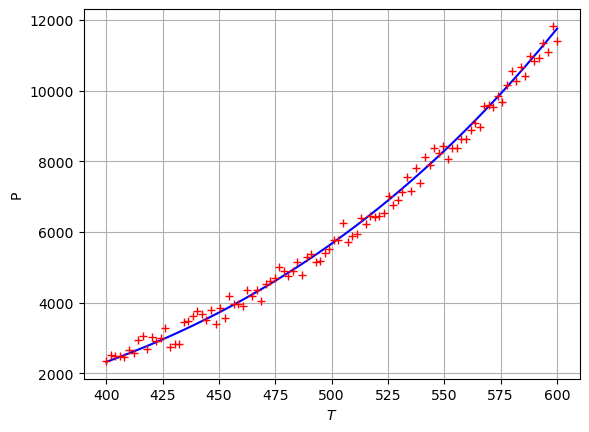

In [2]:
#Preparing experimental data  fo Problem 2
nT=100
T=np.linspace(400,600,nT)
emissivity=0.8; area=2; sigma=5.67*10**(-8)
#log_P=np.log(emissivity*sigma*area*T**4)
P=emissivity*sigma*area*T**4
plt.plot(T, P, 'b', label='$x_1(t)$')
plt.xlabel('$T$')
plt.ylabel('P')
plt.grid()

np.random.seed(0)
nrows=3; ncolumns=4
dP=0.06*np.max(P)*(np.random.rand(nT)-0.5)
P=P+dP
plt.plot(T, P, 'r+', label='$x_1(t)$')
plt.show()
import scipy.io as sio
data= {'T':T, 'P':P}
sio.savemat('exp_data_heat_transfer_250107.mat',data)

## 2 (3p), Stefan-Boltzmann's law
Experimental data of how power $P$ [W] is radiated from a black body in terms of its temperature $T$ [K] is given in the file  
exp_data_heat_transfer_250107.mat 

Determine the $k_1$ and $k_2$ in the following assumed relation between $P$ and $T$:
$$
P=k_1 \, T^{k_2}
$$ 

Plot experimental data and your fitted model in a graph. 



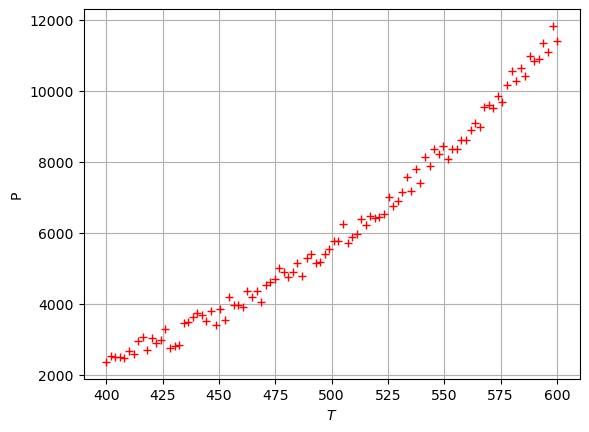

In [3]:
mat_file=sio.loadmat('exp_data_heat_transfer_250107.mat')
P=mat_file['P'] # P
T=mat_file['T'] # T
plt.plot(T[0,:], P[0,:], 'r+', label='experimental data')
plt.xlabel('$T$')
plt.ylabel('P')
plt.grid()

$k_1$=1.590095654280388e-07, $k_2=$=3.9096489805495773
[[-15.65430148]
 [  3.90964898]]


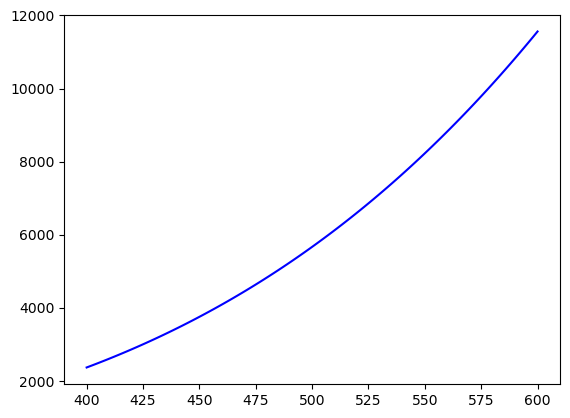

In [4]:
#solution
no_points=np.size(T,1)
A=np.zeros((no_points,2))
b=np.zeros((no_points,1))
for i in range(no_points):
    A[i,0]=1.
    A[i,1]=np.log(T[0,i])
    b[i,0]=np.log(P[0,i])

#Pseudo inverse
A_pinv=np.linalg.pinv(A)
x=A_pinv@b

k1=np.exp(x[0,0])
k2=x[1,0]
print(f'$k_1$={k1}, $k_2=$={k2}')
print(f'{x}')

Pmodel=np.zeros((no_points,1))
for i in range(no_points):
    Pmodel[i,0]=k1*T[0,i]**k2
plt.plot(T[0,:], Pmodel[:,0], 'b-', label='predicted results')
plt.show()


## 3. (4p)
Photo compression. Load the a picture and plot it by the following commands:


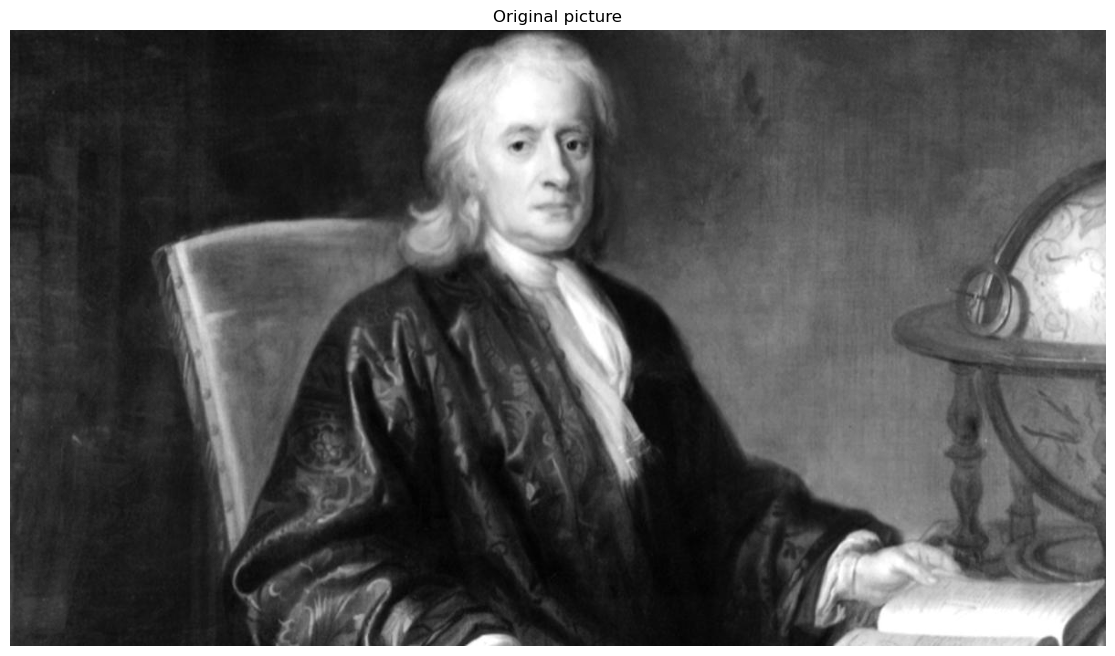

In [5]:
# Read the screenshot image
filename = 'DATA/Isaac_Newton.jpg'  # File path of the image
X = imread(filename)  # Read the image

plt.rcParams['figure.figsize'] = [16, 8]  # Set plot figure size
# Display the original image
img = plt.imshow(X)  # Display the grayscale image
img.set_cmap('gray')  # Set colormap to grayscale
plt.axis('off')  # Turn off axis labels
plt.title('Original picture')  # Set the title
plt.show()  # Show the plot

now use SVD with 5,50 and 200 terms to approximate the full matrix $X$. Determine how many stored values (relative to the full $X$) and the relative error for the different number of terms. 

675
675


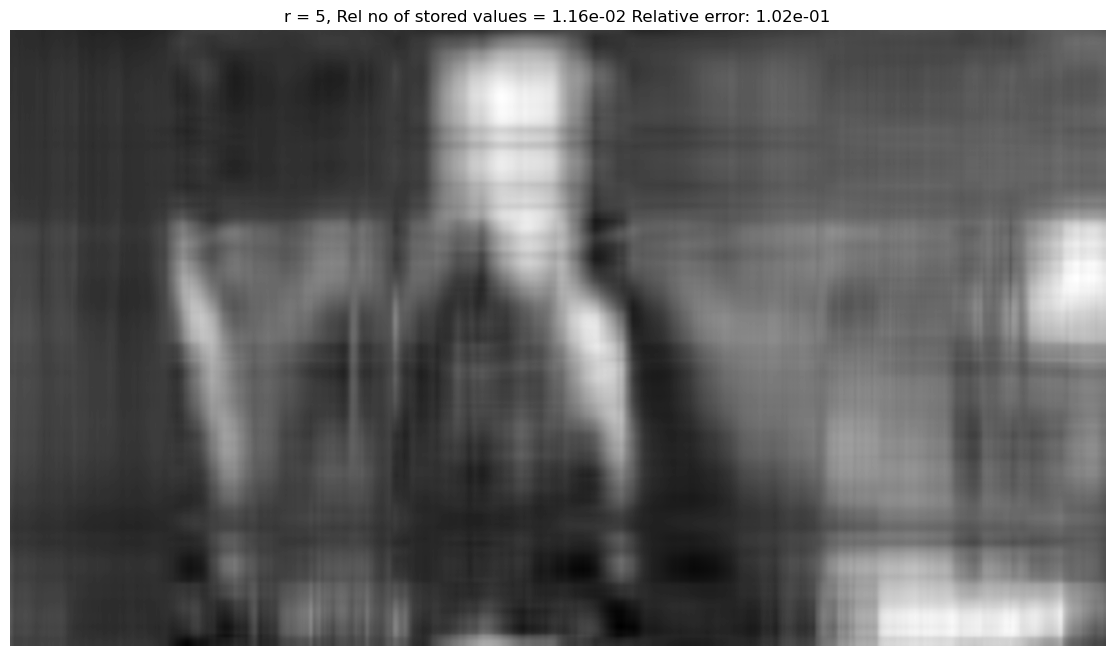

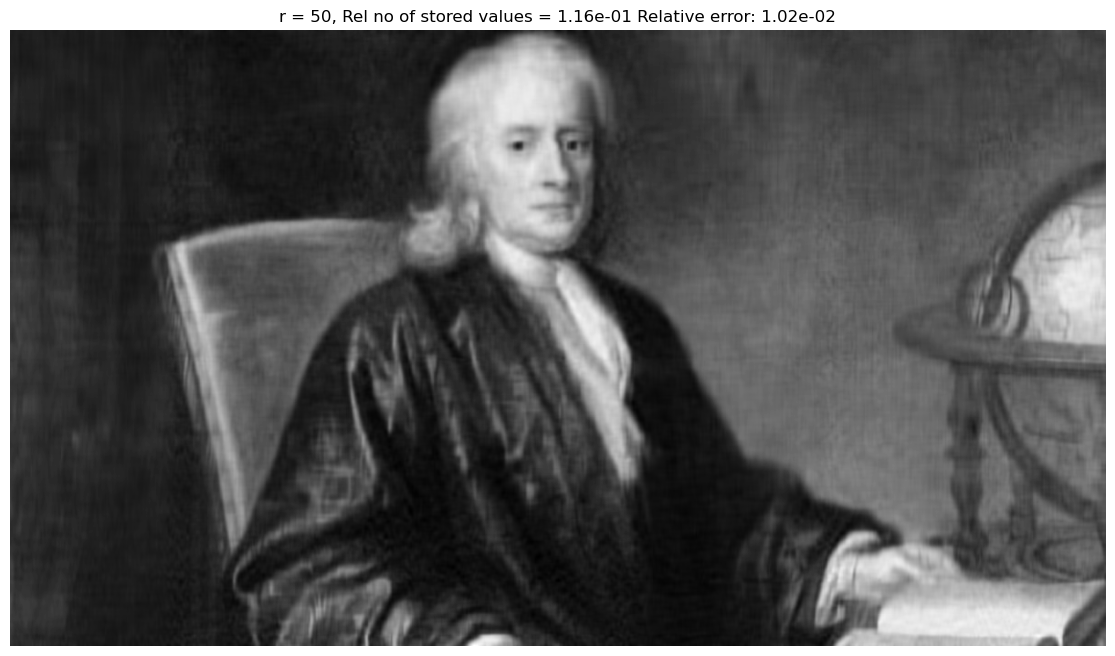

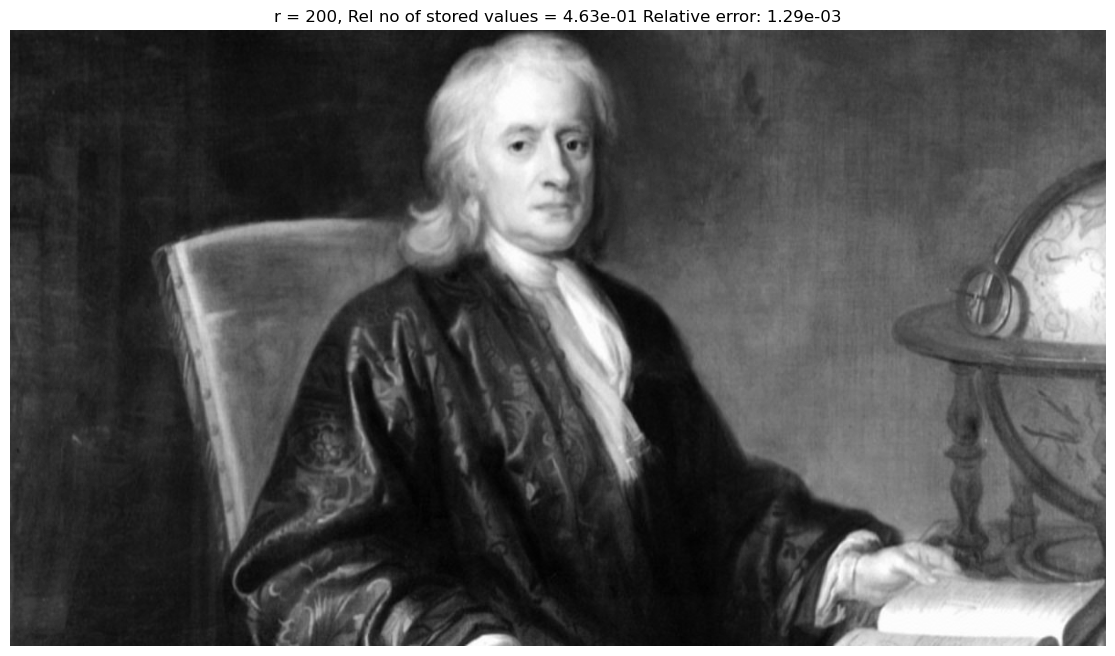

In [10]:
#Solution:

# Perform economy SVD on the grayscale image
U, S, VT = np.linalg.svd(X, full_matrices=False)  # Compute the economy SVD matrices
S = np.diag(S)  # Construct a diagonal matrix from the singular values

# Construct approximate images for different ranks
j = 0
r_vector = [5, 50, 200]  # Different ranks for approximation
rel_no_stored_values = np.zeros(len(r_vector))
rel_error_values = np.zeros(len(r_vector))

print(np.size(U, 0))
print(np.size(VT, 0))
for r in r_vector:
    # Compute the approximation using SVD
    Xapprox = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
    
    # Compute relative number of stored values and relative error
    rel_no_stored_values[j] = (np.size(U, 0) * r + r + r*np.size(VT, 1)) / (np.size(X, 0) * np.size(X, 1))
    rel_error_values[j] = np.linalg.norm(Xapprox - X, 2) / np.linalg.norm(X, 2)
    
    # Display the approximate image
    plt.figure(j+1)
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    value1 = '{:.2e}'.format(rel_no_stored_values[j])
    value2 = '{:.2e}'.format(rel_error_values[j])
    plt.title('r = ' + str(r) + ', Rel no of stored values = ' + str(value1) + ' Relative error: ' + str(value2))
    j += 1
    plt.show()


## 4. (5p)
For the NN in the figure:

<img src="nn_250107.png" alt="Neural Network" width="900"/>


Assume that the weights are random numbers between -1 and 1 (use np.random.rand see python_help file). Also assume that there are nonzero biases for hidden layer 1 and hidden layer 2 (but no biases for output layer). Choose these biases also as random numbers between -1 and 1. As the activation function use the sigmoid function.


a) Determine the outputs $\hat{y}_1$ and  $\hat{y}_2$ for $x_1=7$. 

b) The determine the gradients of $\hat{y}_1$ and  $\hat{y}_2$ w.r.t. the parameters of the NN for $x_1=7$. 


In [13]:
#Solution
# 1x1 -> 3x1 -> 3x1 -> 2x1
# w1=3x1, w2=3x3, w3=2x3
# b1=3x1, b2=3x1
#from help file
np.random.seed(0) # for getting out the same random variables every time (reproducability)
#np.random.rand(nrows,ncolumns) #gives matrix with random number between 0 and 1
w1=torch.tensor(2.*( np.random.rand(3,1)-0.5),dtype=torch.float64,requires_grad=True) #3x1
b1=torch.tensor(2.*( np.random.rand(3)-0.5),dtype=torch.float64,requires_grad=True) #3x1
w2=torch.tensor(2.*( np.random.rand(3,3)-0.5),dtype=torch.float64,requires_grad=True) #3x3
b2=torch.tensor(2.*( np.random.rand(3)-0.5),dtype=torch.float64,requires_grad=True) #3x1
w3=torch.tensor(2.*( np.random.rand(2,3)-0.5),dtype=torch.float64,requires_grad=True) #2x3


In [14]:
#a
def get_yhat():
    x=torch.tensor([7.], dtype=torch.float64,requires_grad=False)
    a1=torch.sigmoid(w1@x+b1) #hidden layer 1
    a2=torch.sigmoid(w2@a1+b2) #hidden layer 2
    yhat=torch.sigmoid(w3@a2) #output layer
    return yhat
yhat=get_yhat()
print('pytorch output',yhat)

pytorch output tensor([[0.2873, 0.2943, 0.2873],
        [0.5472, 0.5300, 0.5471]], dtype=torch.float64,
       grad_fn=<SigmoidBackward0>)


In [63]:

#b
yhat[0].backward()
# Access the gradients of y1
dyhat_dw1 = w1.grad
print("Gradient dyhat1_dw1:", dyhat_dw1)
dyhat_db1 = b1.grad
print("Gradient dyhat1_db1:", dyhat_db1)
dyhat_dw2 = w2.grad
print("Gradient dyhat1_dw2:", dyhat_dw2)
dyhat_db2 = b2.grad
print("Gradient dyhat1_db2:", dyhat_db2)
dyhat_dw3 = w3.grad
print("Gradient dyhat1_dw3:", dyhat_dw3)


Gradient dyhat1_dw1: tensor([[-0.0073],
        [ 0.0224],
        [-0.0069]], dtype=torch.float64)
Gradient dyhat1_db1: tensor([-0.0010,  0.0032, -0.0010], dtype=torch.float64)
Gradient dyhat1_dw2: tensor([[0.0145, 0.0201, 0.0180],
        [0.0199, 0.0275, 0.0247],
        [0.0232, 0.0321, 0.0288]], dtype=torch.float64)
Gradient dyhat1_db2: tensor([0.0212, 0.0291, 0.0339], dtype=torch.float64)
Gradient dyhat1_dw3: tensor([[0.1090, 0.0626, 0.1170],
        [0.0000, 0.0000, 0.0000]], dtype=torch.float64)


In [64]:

yhat=get_yhat()
yhat[1].backward()
# Access the gradients of y2
dyhat_dw1 = w1.grad
print("Gradient dyhat2_dw1:", dyhat_dw1)
dyhat_db1 = b1.grad
print("Gradient dyhat2_db1:", dyhat_db1)
dyhat_dw2 = w2.grad
print("Gradient dyhat2_dw2:", dyhat_dw2)
dyhat_db2 = b2.grad
print("Gradient dyhat2_db2:", dyhat_db2)
dyhat_dw3 = w3.grad
print("Gradient dyhat2_dw3:", dyhat_dw3)


Gradient dyhat2_dw1: tensor([[-0.0062],
        [ 0.0378],
        [-0.0023]], dtype=torch.float64)
Gradient dyhat2_db1: tensor([-0.0009,  0.0054, -0.0003], dtype=torch.float64)
Gradient dyhat2_dw2: tensor([[0.0348, 0.0481, 0.0432],
        [0.0172, 0.0238, 0.0213],
        [0.0408, 0.0565, 0.0507]], dtype=torch.float64)
Gradient dyhat2_db2: tensor([0.0509, 0.0251, 0.0597], dtype=torch.float64)
Gradient dyhat2_dw3: tensor([[0.1090, 0.0626, 0.1170],
        [0.1415, 0.0813, 0.1519]], dtype=torch.float64)


## 5. (5p)
The deflection of beams have been measured and the data is collected in the snapshot matrix X where each columns gives the deflections for a beam. There are two types of boundary conditions on the beams.


a) Use SVD to argue why the data contains two beam types. X is found in the beams_250107.mat file.


In [7]:

#Load data from .mat file
mat_file=sio.loadmat('beams_250107.mat')
X=mat_file['X'] 
y=mat_file['y']


b) Plot the typical mode shapes of the two beam types.

c) The types of beams of the are are given by the matrix $y$ (also found in the beams_250107.mat file). A row of this matrix correspond to the same beam as a column in the input_data matrix, and if the row is (1,0) then it is the first beam type while if the row is (0,1) then it is the second beam type. Train a neural network for classification based on the beam deflection. Use 70% of the data for training and 30% for testing the neural network. How many of the testing cases can your neural network classify?


Singular values [3.24421941e+02 2.69406232e+01 2.15827612e-14 1.96814743e-14
 1.44713807e-14 7.07621807e-15 5.65351161e-15 3.72358857e-15
 3.64863755e-15 4.99656525e-16]


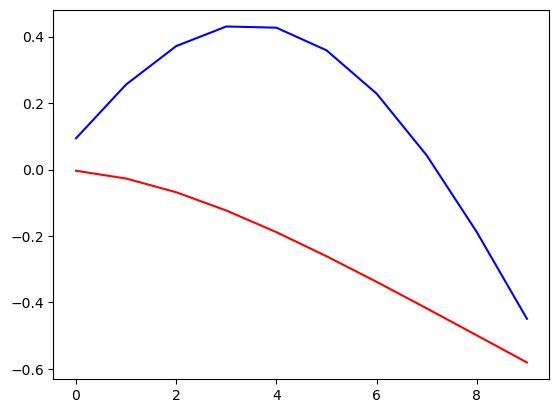

In [8]:
#Solution a,b
U, S, Vt = np.linalg.svd(X, full_matrices=False)

print(f'Singular values {S}')
plt.plot(U[:, 0] , label='U[:,0]', linestyle='-', color='red')
plt.plot(U[:, 1] , label='U[:,1]', linestyle='-', color='blue')

In [9]:
#Solution c) 
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        x = self.fc(x)
        return x

x=X.T  # to get the data in one row for each beam, similar to y
num_samples=np.size(x,0)

indices=list(range(0, num_samples)) #numbers
   

# Split the dataset into training and testing sets (70% training, 30% testing)
split_ratio = 0.7
split_index = int(num_samples * split_ratio)

# Split the data based on the shuffled indices
x_train, x_test = x[indices[:split_index],:], x[indices[split_index:],:]
y_train, y_test = y[indices[:split_index],:], y[indices[split_index:],:]


# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


# Convert data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        x = self.fc(x)
        return x

# Initialize the model, loss function, and optimizer
input_size = np.size(x,1)
output_size = 2  # Number of classes
model = SimpleNN(input_size, output_size)
criterion = nn.CrossEntropyLoss()   #here comes cross entropy loss function
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train_tensor)
    probabilities=torch.softmax(outputs, dim=1)   #here comes softmax function 
    loss = criterion(probabilities, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# Model evaluation
model.eval()
with torch.no_grad():
    outputs = model(x_test_tensor)
    probabilities=torch.softmax(outputs, dim=1)
    predicted_classes=torch.argmax(probabilities, dim=1)
    test_classes=torch.argmax(y_test_tensor, dim=1)
accuracy = torch.sum(predicted_classes == test_classes).item() / y_test_tensor.size(0)
print(f"Accuracy: {accuracy * 100:.2f}%")


Epoch [100/1000], Loss: 0.3695
Epoch [200/1000], Loss: 0.3517
Epoch [300/1000], Loss: 0.3444
Epoch [400/1000], Loss: 0.3401
Epoch [500/1000], Loss: 0.3373
Epoch [600/1000], Loss: 0.3352
Epoch [700/1000], Loss: 0.3335
Epoch [800/1000], Loss: 0.3322
Epoch [900/1000], Loss: 0.3311
Epoch [1000/1000], Loss: 0.3301
Accuracy: 93.33%


## 6. (5p)

Use the experimental data from Problem 2 but use 80% as training data by taking the first 80 components of random_vector

In [10]:
np.random.seed(0) # for getting out the same random variables every time (reproducability)
random_vector = np.random.permutation(100)
mat_file=sio.loadmat('exp_data_heat_transfer_250107.mat')
P=mat_file['P'] # P
T=mat_file['T'] # T
training_index=random_vector[0:79]
validation_index=random_vector[80:99]
T_training=T[0,training_index]
P_training=P[0,training_index]
T_validation=T[0,validation_index]
P_validation=P[0,validation_index]




a) Train a NN to the training data. Assume 1 hidden layer with 10 neurons. Apply the sigmoid activation function (nn.Sigmoid) for the hidden layer. Plot how well/bad the NN fits the training data. You try any regularization parameter and optimization algorithm (with tolerances etc.). Use max 10000 epochs. NOTE: the results is probably bad, therefore don't try too much, instead continue with b)  

  

  

b ) Scale your data by using MinMaxScaler class (see python_help file) and the following code:

In [ ]:
scaler_T = MinMaxScaler() #create a scaler for T
scaled_T = scaler_T.fit_transform(T_training)
scaler_P = MinMaxScaler()  #create a scaler for P
scaled_P = scaler_P.fit_transform(P_training)

Now train the NN against the scaled data instead. Plot how well/bad the NN fits the scaled training data. Also include the validation data in the same plot.

In [11]:

#x: input data
#y: output data
#lambda_l1: LASSO regularization parameter
#optim_alg: choice of optimization algorithm 'LBFGS', 'Adam','SGD'
def my_nn(x,y,lambda_l1,optim_alg):
    # Convert the data to PyTorch tensors
    x_tensor = torch.from_numpy(x).float().unsqueeze(1)
    y_tensor = torch.from_numpy(y).float().unsqueeze(1)

    # Define the neural network model
    class SinNet(nn.Module):
        def __init__(self):
            super(SinNet, self).__init__()
            self.fc1 = nn.Linear(1, 10)   
            self.fc2 = nn.Linear(10, 10)
            self.fc3 = nn.Linear(10, 1)
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            x = self.sigmoid(self.fc1(x))
            x = self.sigmoid(self.fc2(x))
            x = self.fc3(x)
            return x

    # Set a random seed for reproducibility, the same initial guess
    torch.manual_seed(0)
    
    # Create an instance of the SinNet model
    model = SinNet()  

    # Define the loss function
    criterion = nn.MSELoss()

    # Create a function for LBFGS closure

    def closure():
        optimizer.zero_grad()
        outputs = model(x_tensor)
        loss = criterion(outputs, y_tensor)
    # Calculate the L1 regularization term
        l1_regularization = torch.tensor(0.)
        for param in model.parameters():
            l1_regularization += torch.norm(param, p=1)
    
        # Add the L1 regularization term to the loss
        loss += lambda_l1 * l1_regularization
        loss.backward()
        return loss
    def closure_wrapper():
            loss = closure()
            return loss
    
    
    prev_loss = float('inf')  # Initialize with a large value
    tolerance = 1.e-7
    max_no_epoch=10000

    if optim_alg=='LBFGS':
        optimizer = optim.LBFGS(model.parameters(), lr=0.01, max_iter=1000,tolerance_change=tolerance)
    #alternatively:
    elif optim_alg=='Adam': 
        optimizer = optim.Adam(model.parameters(), lr=0.01)
    elif optim_alg=='SGD': 
        optimizer=torch.optim.SGD(model.parameters(), lr=0.1)

    


    # Training loop
    for epoch in range(max_no_epoch):
        
        optimizer.step(closure_wrapper)

    # Print the loss every 10th epoch
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}], Loss: {closure().item():.4f}")

        loss = closure()
    
        loss_change = prev_loss - loss.item()
        prev_loss = loss.item()
    
        # Check if the optimizer has converged (you can modify this condition)
    
        if optim_alg=='LBFGS':
            if loss_change < tolerance:
                print(f"Optimizer has converged. Stopping training.")
                break

    # Plot the original data and the fitted curve
    plt.scatter(x, y, label='Original Data')
    plt.plot(x, model(x_tensor).detach().numpy(), 'r+', label='Fitted Curve')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
    return model



Epoch [10], Loss: 48518716.0000
Epoch [20], Loss: 48506552.0000
Epoch [30], Loss: 48491408.0000
Epoch [40], Loss: 48474532.0000
Epoch [50], Loss: 48457156.0000
Epoch [60], Loss: 48439636.0000
Epoch [70], Loss: 48421612.0000
Epoch [80], Loss: 48403852.0000
Epoch [90], Loss: 48386592.0000
Epoch [100], Loss: 48369912.0000
Epoch [110], Loss: 48353648.0000
Epoch [120], Loss: 48337688.0000
Epoch [130], Loss: 48321952.0000
Epoch [140], Loss: 48306388.0000
Epoch [150], Loss: 48290980.0000
Epoch [160], Loss: 48275692.0000
Epoch [170], Loss: 48260512.0000
Epoch [180], Loss: 48245424.0000
Epoch [190], Loss: 48230408.0000
Epoch [200], Loss: 48215468.0000
Epoch [210], Loss: 48200576.0000
Epoch [220], Loss: 48185760.0000
Epoch [230], Loss: 48170984.0000
Epoch [240], Loss: 48156260.0000
Epoch [250], Loss: 48141576.0000
Epoch [260], Loss: 48126932.0000
Epoch [270], Loss: 48112312.0000
Epoch [280], Loss: 48097736.0000
Epoch [290], Loss: 48083192.0000
Epoch [300], Loss: 48068672.0000
Epoch [310], Loss: 

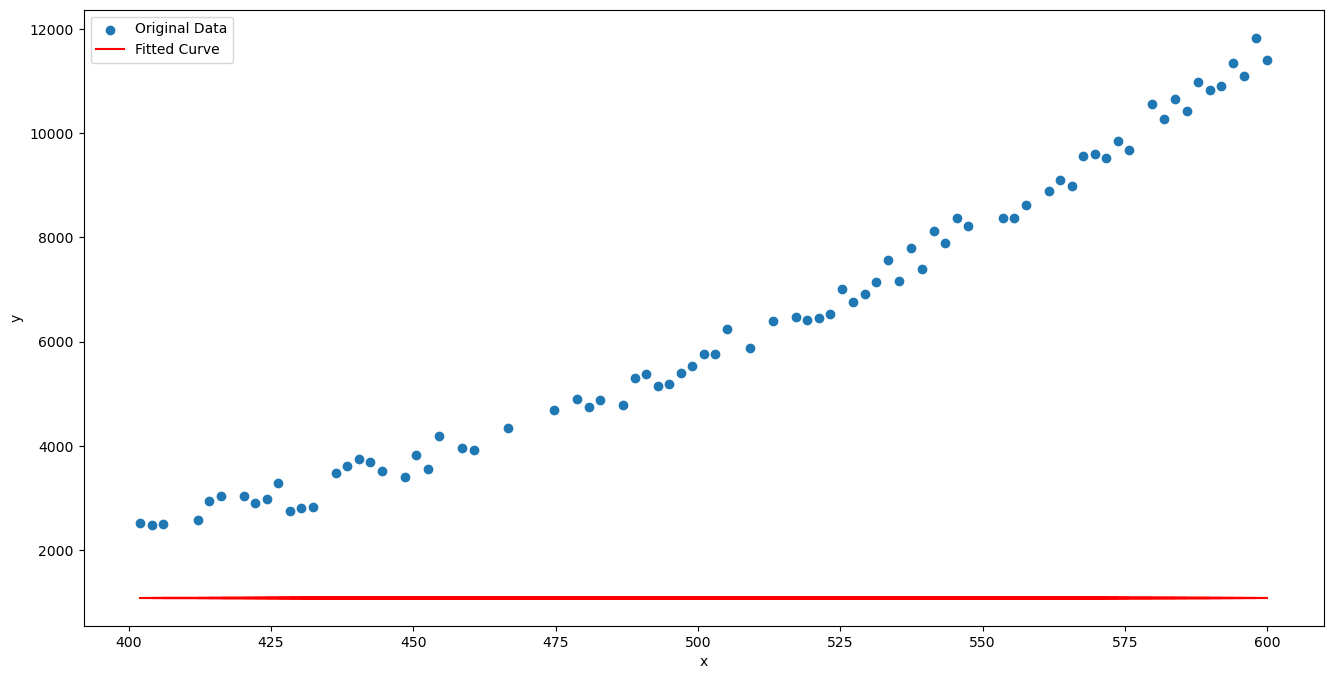

In [114]:


optim_alg='Adam'  #'LBFGS'
# Define the L1 regularization strength (lambda)
lambda_l1 = 0.0001  # You can adjust this value
mymodel=my_nn(T_training,P_training,lambda_l1,optim_alg)

In [12]:
class MinMaxScaler:
    def __init__(self, feature_range=(0, 1)):
        self.min_val = feature_range[0]
        self.max_val = feature_range[1]
        self.data_min_ = None
        self.data_max_ = None

    def fit(self, data):
        """Compute the minimum and maximum values for scaling."""
        self.data_min_ = np.min(data)
        self.data_max_ = np.max(data)

    def transform(self, data):
        """Scale the data using the computed min and max values."""
        # Avoid division by zero for constant columns
        scale = (self.max_val - self.min_val) / (self.data_max_ - self.data_min_ + 1e-8)
        return self.min_val + (data - self.data_min_) * scale

    def fit_transform(self, data):
        """Fit and then transform the data."""
        self.fit(data)
        return self.transform(data)

    def inverse_transform(self, scaled_data):
        """Revert the scaling to original values."""
        scale = (self.max_val - self.min_val) / (self.data_max_ - self.data_min_ + 1e-8)
        return (scaled_data - self.min_val) / scale + self.data_min_



Now scale your data by using MinMaxScaler class (see python_help file) and the following code:

In [13]:
scaler_T = MinMaxScaler() #create a scaler for T
scaled_T = scaler_T.fit_transform(T_training)
scaler_P = MinMaxScaler()  #create a scaler for P
scaled_P = scaler_P.fit_transform(P_training)

Now train the NN against the scaled data instead. Plot how well/bad the NN fits the scaled training data. Also include the validation data in the same plot.

Epoch [10], Loss: 0.0839
Epoch [20], Loss: 0.0791
Epoch [30], Loss: 0.0700
Epoch [40], Loss: 0.0517
Epoch [50], Loss: 0.0243
Epoch [60], Loss: 0.0097
Epoch [70], Loss: 0.0114
Epoch [80], Loss: 0.0090
Epoch [90], Loss: 0.0089
Epoch [100], Loss: 0.0084
Epoch [110], Loss: 0.0082
Epoch [120], Loss: 0.0079
Epoch [130], Loss: 0.0077
Epoch [140], Loss: 0.0075
Epoch [150], Loss: 0.0074
Epoch [160], Loss: 0.0072
Epoch [170], Loss: 0.0071
Epoch [180], Loss: 0.0070
Epoch [190], Loss: 0.0068
Epoch [200], Loss: 0.0067
Epoch [210], Loss: 0.0066
Epoch [220], Loss: 0.0065
Epoch [230], Loss: 0.0064
Epoch [240], Loss: 0.0063
Epoch [250], Loss: 0.0062
Epoch [260], Loss: 0.0061
Epoch [270], Loss: 0.0061
Epoch [280], Loss: 0.0060
Epoch [290], Loss: 0.0059
Epoch [300], Loss: 0.0058
Epoch [310], Loss: 0.0057
Epoch [320], Loss: 0.0057
Epoch [330], Loss: 0.0056
Epoch [340], Loss: 0.0056
Epoch [350], Loss: 0.0054
Epoch [360], Loss: 0.0054
Epoch [370], Loss: 0.0053
Epoch [380], Loss: 0.0053
Epoch [390], Loss: 0.

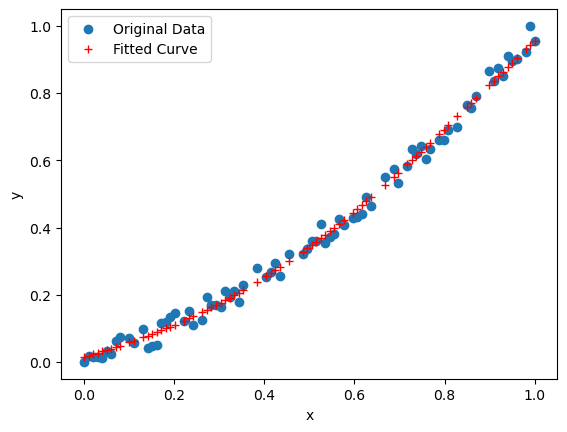

In [14]:

optim_alg='Adam'  #'LBFGS'
# Define the L1 regularization strength (lambda)
lambda_l1 = 0.0001  # You can adjust this value
mymodel=my_nn(scaled_T,scaled_P,lambda_l1,optim_alg)


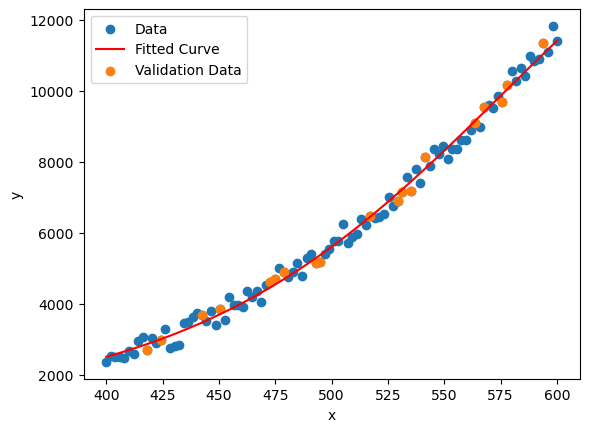

In [15]:
scaled_T_total = scaler_T.fit_transform(T[0,:])
scaled_P_total = scaler_P.fit_transform(P[0,:])

plt.scatter(scaler_T.inverse_transform(scaled_T_total),P[0,:], label='Data')
plt.plot(scaler_T.inverse_transform(scaled_T_total), scaler_P.inverse_transform(mymodel(torch.from_numpy(scaled_T_total).float().unsqueeze(1)).detach().numpy()), 'r-', label='Fitted Curve')
plt.scatter(T_validation,P_validation, label='Validation Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 7 (5p) Heat transfer
The 1d stationary heat equation is expressed as $-d q/dx+ Q=0$ where $q$  is the heat flux and $Q$ is the source term. For the considered 1d structure the heat conduction coefficient $k$ depends on $x$. Hence, the Fourier's law can be written as modelled as $q=-k(x) \, dT/dx$. Assume a constant heat source $Q=50$, length $L=1$, and $T_{1}=10$ and $T_{2}=20$.

If the temperature field has been determined to
$$
T{\left(x \right)} = 9 L^{2} Q \sqrt[3]{e^{\frac{x}{L}}} + \left(- 3 L Q x + \frac{- 6 L^{2} Q e^{\frac{1}{3}} + 9 L^{2} Q - T_{1} + T_{2}}{-1 + e^{\frac{1}{3}}}\right) e^{\frac{x}{3 L}} + \frac{- 3 L^{2} Q e^{\frac{1}{3}} + T_{1} e^{\frac{1}{3}} - T_{2}}{-1 + e^{\frac{1}{3}}}
$$
determine $k(x)$ by using PINN. Compare your solution against the analytical solution $k(x)=-\frac{x}{3L}$.

The analytical solution for $T(x)$ and the measurement points $x$ are generated as:

In [128]:
#%% Problem data
N = 20
L = 1

def generate_grid_1d(length, samples=20, initial_coordinate=0.0):
    """Generate an evenly space grid of a given length and a given number of samples."""

    # Generate the grid
    x = torch.linspace(initial_coordinate, initial_coordinate + length, samples, requires_grad=True)

    # Reshape on a column tensor and return
    return x.view(samples, 1)


x = generate_grid_1d(L, N)

T1=10; Q=50; T2=20
k_analytic=torch.exp(-x/L/3)
T_analytic = lambda x: 9*L**2*Q*torch.exp(x/L)**(1/3) \
        + (-3*L*Q*x + (-6*L**2*Q*np.exp(1/3) + 9*L**2*Q - T1 + T2)/(-1 + np.exp(1/3)))*torch.exp(x/(3*L)) \
        + (-3*L**2*Q*np.exp(1/3) + T1*np.exp(1/3) - T2)/(-1 + np.exp(1/3))

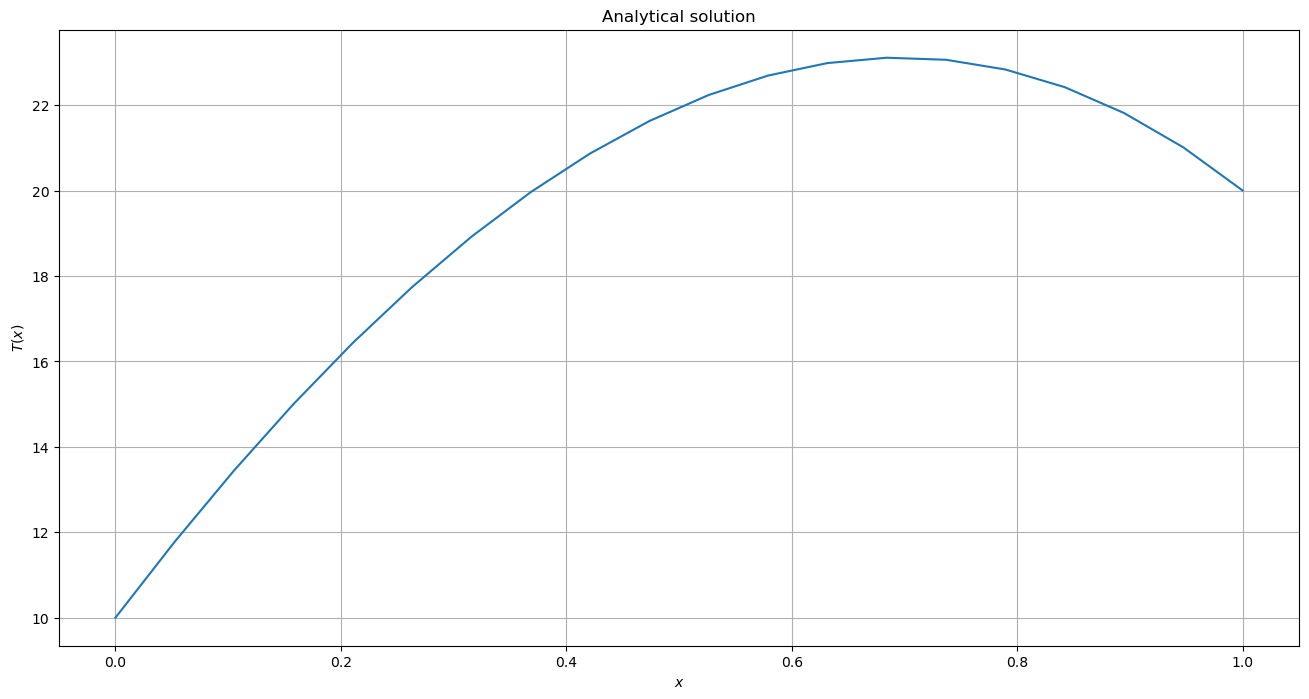

In [129]:
#Solution
fig, ax = plt.subplots(nrows=1, ncols=1)                                                                   
plt.plot(x.detach().numpy(),T_analytic(x).detach().numpy())
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$T(x)$')
ax.grid(True)
#ax.legend(loc='best')
ax.set_title('Analytical solution')
plt.show()

In [134]:
#%% define pinn
class pinnModel(nn.Module):
    def __init__(self):
        super(pinnModel, self).__init__()
        # Define layers for the neural network
        self.fc1 = nn.Linear(1, 10)  # Fully connected layer with 1 input and 10 output units
        self.fc2 = nn.Linear(10, 1)  # Fully connected layer with 10 input and 1 output units
        self.tanh = nn.Tanh()         # Tanh activation function

    def forward(self, x):
        # Define the forward pass of the neural network
        x = self.tanh(self.fc1(x))  # Apply sigmoid activation to the first layer
        x = self.fc2(x)  # Output layer (no activation function)
        return x
    
# Create an instance of the SinNet model
model = pinnModel()


def get_derivative(y, x, n):
    """Compute the nth order derivative of y = f(x) with respect to x."""
    dtype = torch.float
    device = torch.device("cpu")
    if n == 0:
        return y
    else:
        dy_dx = grad(y, x, torch.ones(x.size()[0], 1, device=device), create_graph=True, retain_graph=True)[0]
        return get_derivative(dy_dx, x, n - 1)

In [135]:
#%% define loss
def criterion(model,x):
        """Compute the cost function."""
        T=T_analytic(x)
        dTdx=get_derivative(T, x, 1)
        d2Tdx2=get_derivative(T, x, 2)
        k=model(x)
        dkdx=get_derivative(k, x, 1)
        
        # Differential equation loss
        differential_equation_loss = dkdx*dTdx+k* d2Tdx2  + Q #error in earlier version forgot the first term
        differential_equation_loss = torch.sum(differential_equation_loss ** 2).view(1)
        
        return differential_equation_loss

#%% function for closure
# Create a function for closure
def closure(x_tensor):
    optimizer.zero_grad() # Clear gradients from the previous iteration
    loss_de = criterion(model,x_tensor) # Compute the loss
    loss = loss_de
# Calculate the L1 regularization term
    l1_regularization = torch.tensor(0.)
    for param in model.parameters():
        l1_regularization += torch.norm(param, p=1)

    # Add the L1 regularization term to the loss
    lambda_l1=0.
    loss += lambda_l1 * l1_regularization # Compute the loss
    loss.backward() # Compute gradients using backpropagation
    return loss,loss_de



In [136]:
#%% training
prev_loss = float('inf')  # Initialize with a large value
tolerance = 1.e-7
max_no_epoch=8000


optim_alg='LBFGS'
if optim_alg=='LBFGS':
    optimizer = optim.LBFGS(model.parameters(), lr=0.01, max_iter=max_no_epoch,tolerance_change=tolerance)
#alternatively:
elif optim_alg=='Adam': 
    optimizer = optim.Adam(model.parameters(), lr=0.01)
elif optim=='SGD': 
    optimizer=torch.optim.SGD(model.parameters(), lr=0.1)


#for saving training result
differential_equation_loss_history = np.zeros(max_no_epoch)
# Training loop
for epoch in range(max_no_epoch):
    def closure_wrapper():
        loss,loss_de = closure(x)
        differential_equation_loss_history[epoch] += loss_de.item()
        return loss 
    loss=optimizer.step(closure_wrapper)

# Print the loss every epoch
    if (epoch + 1) % 1 == 0:
        print(f"Epoch [{epoch+1}], Loss: {loss.item():.4f}")
            
    loss_change = prev_loss - loss.item()
    prev_loss = loss.item()

    # Check if the optimizer has converged (you can modify this condition)

    if optim_alg=='LBFGS':
        if loss_change < tolerance:
            print(f"Optimizer has converged. Stopping training.")
            break

Epoch [1], Loss: 5780.2217
Epoch [2], Loss: 0.0001
Epoch [3], Loss: 0.0001
Epoch [4], Loss: 0.0001
Epoch [5], Loss: 0.0001
Epoch [6], Loss: 0.0001
Epoch [7], Loss: 0.0001
Epoch [8], Loss: 0.0001
Epoch [9], Loss: 0.0001
Epoch [10], Loss: 0.0001
Optimizer has converged. Stopping training.


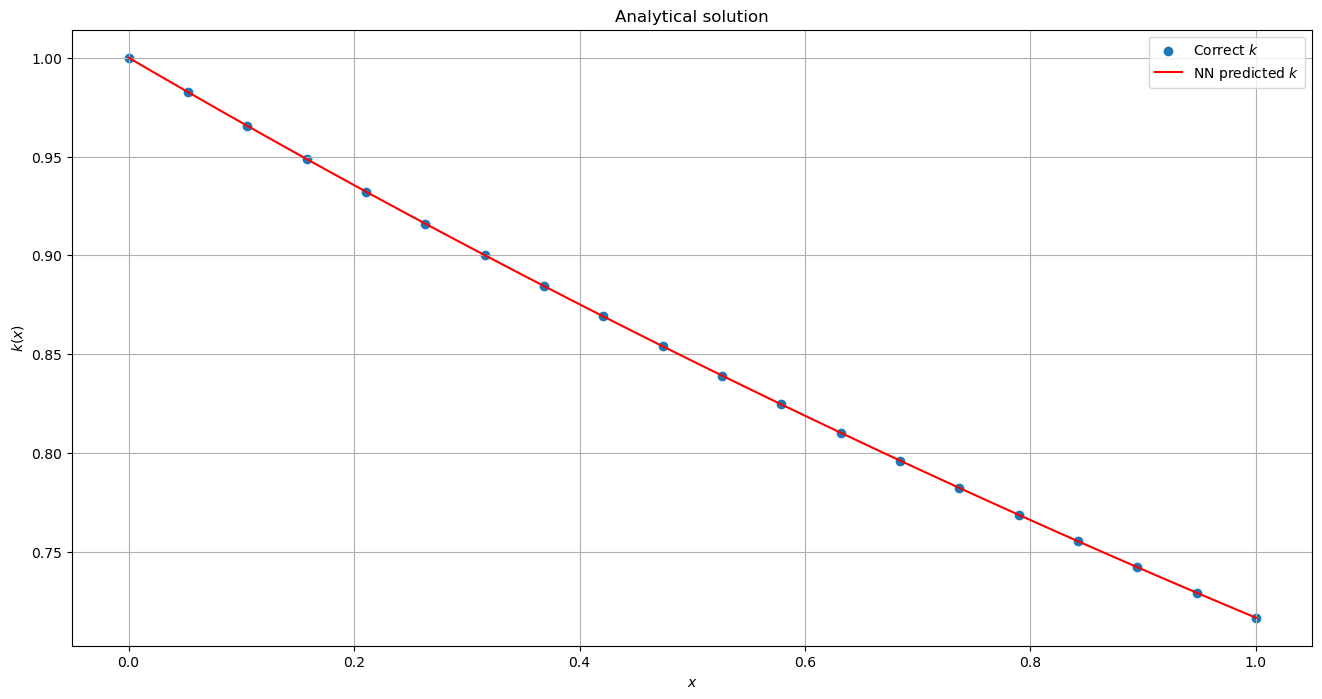

In [137]:
#%% plot result
k_analytic=lambda x: torch.exp(-(x)/(L*3)) 
#

fig, ax = plt.subplots(nrows=1, ncols=1)                                                                   
plt.scatter(x.detach().numpy(), k_analytic(x).detach().numpy(), label='Correct $k$')
xdense = generate_grid_1d(L, 100)
pred_k=model(xdense)
plt.plot(xdense.detach().numpy(),pred_k.detach().numpy(), 'r', label='NN predicted $k$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$k(x)$')
ax.grid(True)
ax.legend(loc='best')
ax.set_title('Analytical solution')
plt.show()